# Part 1 - 2 : Data Analysis

In [23]:
import os, glob, re, spacy, nltk
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy.attrs

%matplotlib inline

from sklearn.utils import shuffle
from spacy import displacy
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
from scipy import stats
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleuze3u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Corpus loading

In [24]:
pre_sci_df = pd.read_csv("../../data/part1/all_articles.csv")
pre_sci_df

,title,content,category
0,Eva Syková,Eva Syková (born 1944) is a Czech neuroscienti...,Women_Scientists
1,Maria Kovacs,Maria Kovacs is an American psychologist and a...,Women_Scientists
2,Joanne Johnson,"\nJoanne S. Johnson (born 1977, Birmingham, né...",Women_Scientists
3,Hua Eleanor Yu,Hua Eleanor Yu is the inaugural Billy and Audr...,Women_Scientists
4,Manju Ray,Manju Ray was an Indian scientist specializing...,Women_Scientists
...,...,...,...
373,Jennifer Thomson,"\nJennifer Ann Thomson (born June 16, 1947) is...",Women_Scientists
374,William McKinley,"\nWilliam McKinley (January 29, 1843 – Septemb...",US_Presidents
375,Priyamvada Natarajan,\nPriyamvada (Priya) Natarajan is a professor ...,Women_Scientists
376,Afërdita Veveçka Priftaj,\nAfërdita Veveçka Priftaj (21 January 1948 – ...,Women_Scientists


## 2. Vocabulary analysis  
### 2.1 Pre-processing  

We shall now clean the raw content of the articles. In this section, we will:
- remove non alpa-numeric symbols like \\n, \\t, _, etc.  
- remove excessive whitespaces (2 or more consecutive whitespaces)  
- remove quotation references (e.g [12])
- lowercase every word  

We will then, after analysing the tokens contained in the text:
- select informative tokens: that is, tokens that are not punctuation or stop words


In [25]:
# A function to remove underscores from the text
def remove_underscores(text:str)->str:
    return text.replace("_", " ")

# A function to remove excess whitespaces from the text
def remove_excess_whitespace(text:str)->str:
    return " ".join(text.split())

# A function to remove \n or \t from the text
def remove_newline_tab(text:str)->str:
    return text.replace("\n", " ").replace("\t", " ")

# A function to remove quotations from the text
def remove_quotations(text:str)->str:
    return re.sub(re.compile("\[\d*\]"), "", text)

# A function to clean the text by calling the above functions
def clean_text(text:str)->str:
    text = remove_underscores(text)
    text = remove_newline_tab(text)
    text = remove_quotations(text)
    text = remove_excess_whitespace(text)
    text = text.lower()
    return text

In [26]:
pre_sci_df["clean_text"] = pre_sci_df["content"].apply(clean_text)
pre_sci_df

,title,content,category,clean_text
0,Eva Syková,Eva Syková (born 1944) is a Czech neuroscienti...,Women_Scientists,eva syková (born 1944) is a czech neuroscienti...
1,Maria Kovacs,Maria Kovacs is an American psychologist and a...,Women_Scientists,maria kovacs is an american psychologist and a...
2,Joanne Johnson,"\nJoanne S. Johnson (born 1977, Birmingham, né...",Women_Scientists,"joanne s. johnson (born 1977, birmingham, née ..."
3,Hua Eleanor Yu,Hua Eleanor Yu is the inaugural Billy and Audr...,Women_Scientists,hua eleanor yu is the inaugural billy and audr...
4,Manju Ray,Manju Ray was an Indian scientist specializing...,Women_Scientists,manju ray was an indian scientist specializing...
...,...,...,...,...
373,Jennifer Thomson,"\nJennifer Ann Thomson (born June 16, 1947) is...",Women_Scientists,"jennifer ann thomson (born june 16, 1947) is a..."
374,William McKinley,"\nWilliam McKinley (January 29, 1843 – Septemb...",US_Presidents,"william mckinley (january 29, 1843 – september..."
375,Priyamvada Natarajan,\nPriyamvada (Priya) Natarajan is a professor ...,Women_Scientists,priyamvada (priya) natarajan is a professor in...
376,Afërdita Veveçka Priftaj,\nAfërdita Veveçka Priftaj (21 January 1948 – ...,Women_Scientists,afërdita veveçka priftaj (21 january 1948 – 4 ...


In [27]:
# Load the spacy model
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Break a text into a list of tokens 
def get_tokens(text):
    """A function that returns a list of tokens from a text"""
    tokens = []
    filtered_tokens = []

    doc = nlp(text)

    for token in doc:
        tokens.append(token)
        if token.is_stop == False and token.is_punct == False:
            filtered_tokens.append(token)
    return tokens, filtered_tokens


In [28]:
tokens, filtered_tokens = [], []

for text in pre_sci_df["clean_text"]:
    token, filtered_token = get_tokens(text)
    tokens.append(token)
    filtered_tokens.append(filtered_token)

In [29]:
pre_sci_df["tokens"] = tokens
pre_sci_df["filtered_tokens"] = filtered_tokens

pre_sci_df

,title,content,category,clean_text,tokens,filtered_tokens
0,Eva Syková,Eva Syková (born 1944) is a Czech neuroscienti...,Women_Scientists,eva syková (born 1944) is a czech neuroscienti...,"[eva, syková, (, born, 1944, ), is, a, czech, ...","[eva, syková, born, 1944, czech, neuroscientis..."
1,Maria Kovacs,Maria Kovacs is an American psychologist and a...,Women_Scientists,maria kovacs is an american psychologist and a...,"[maria, kovacs, is, an, american, psychologist...","[maria, kovacs, american, psychologist, academ..."
2,Joanne Johnson,"\nJoanne S. Johnson (born 1977, Birmingham, né...",Women_Scientists,"joanne s. johnson (born 1977, birmingham, née ...","[joanne, s., johnson, (, born, 1977, ,, birmin...","[joanne, s., johnson, born, 1977, birmingham, ..."
3,Hua Eleanor Yu,Hua Eleanor Yu is the inaugural Billy and Audr...,Women_Scientists,hua eleanor yu is the inaugural billy and audr...,"[hua, eleanor, yu, is, the, inaugural, billy, ...","[hua, eleanor, yu, inaugural, billy, audrey, l..."
4,Manju Ray,Manju Ray was an Indian scientist specializing...,Women_Scientists,manju ray was an indian scientist specializing...,"[manju, ray, was, an, indian, scientist, speci...","[manju, ray, indian, scientist, specializing, ..."
...,...,...,...,...,...,...
373,Jennifer Thomson,"\nJennifer Ann Thomson (born June 16, 1947) is...",Women_Scientists,"jennifer ann thomson (born june 16, 1947) is a...","[jennifer, ann, thomson, (, born, june, 16, ,,...","[jennifer, ann, thomson, born, june, 16, 1947,..."
374,William McKinley,"\nWilliam McKinley (January 29, 1843 – Septemb...",US_Presidents,"william mckinley (january 29, 1843 – september...","[william, mckinley, (, january, 29, ,, 1843, –...","[william, mckinley, january, 29, 1843, septemb..."
375,Priyamvada Natarajan,\nPriyamvada (Priya) Natarajan is a professor ...,Women_Scientists,priyamvada (priya) natarajan is a professor in...,"[priyamvada, (, priya, ), natarajan, is, a, pr...","[priyamvada, priya, natarajan, professor, depa..."
376,Afërdita Veveçka Priftaj,\nAfërdita Veveçka Priftaj (21 January 1948 – ...,Women_Scientists,afërdita veveçka priftaj (21 january 1948 – 4 ...,"[afërdita, veveçka, priftaj, (, 21, january, 1...","[afërdita, veveçka, priftaj, 21, january, 1948..."


### 2.2 Vocabulary extraction : frequent words and word clouds

#### 50 most frequent words and word cloud for *US_Presidents*

In [30]:
# Global text for Presidents
Presidents = pre_sci_df[pre_sci_df["category"] == "US_Presidents"]["clean_text"].str.cat(sep=" ")

# List of tokens for Presidents
Presidents_tokens = []

for tokens in pre_sci_df[pre_sci_df["category"] == "US_Presidents"]["filtered_tokens"]:
    for token in tokens:
        Presidents_tokens.append(token)

# Vocabulary for Presidents
Presidents_vocabulary = set(Presidents_tokens)

print(Presidents_tokens[:20], len(Presidents_vocabulary))

[george, walker, bush, born, july, 6, 1946, american, politician, served, 43rd, president, united, states, 2001, 2009, member, republican, party, previously] 330156


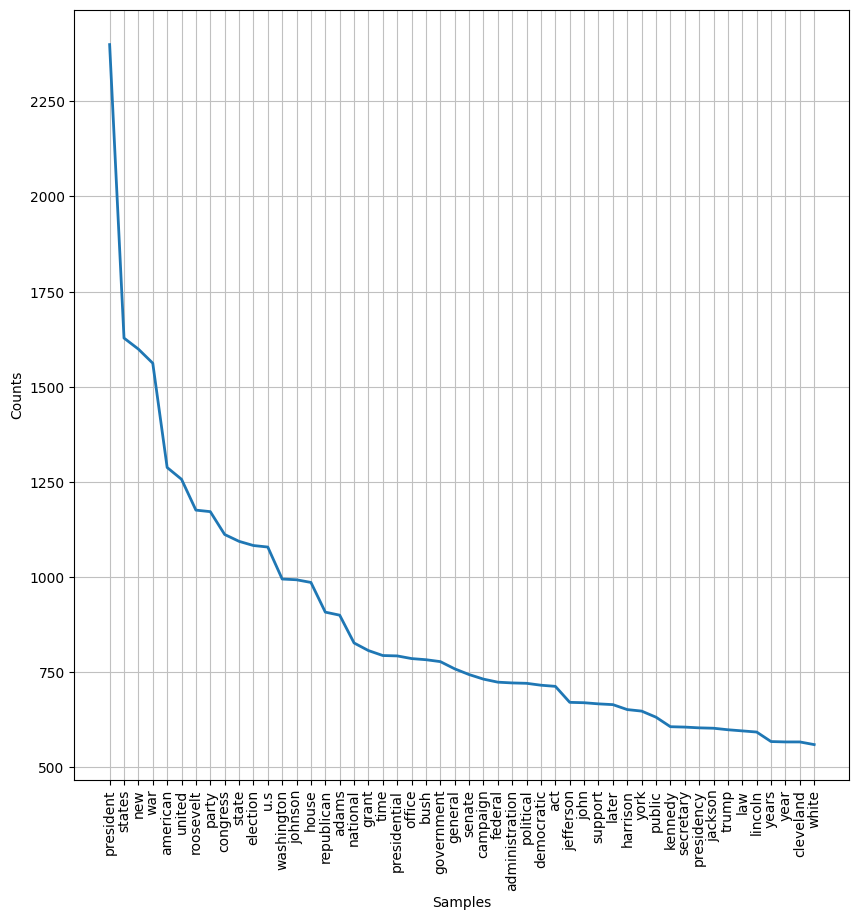

In [31]:
fig = plt.figure(figsize=(10, 10))
frequency_dist = nltk.FreqDist([tok.text for tok in Presidents_tokens])
frequency_dist.plot(50)
# fig.savefig("../data/plots/50_most_frequent_words_US_Presidents.png", bbox_inches="tight")
plt.show()

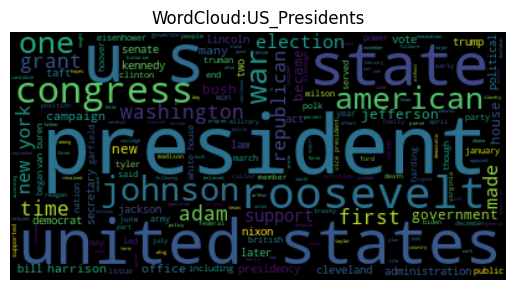

In [32]:
wordcloud = WordCloud().generate(Presidents)
plt.title("WordCloud:US_Presidents")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("../data/plots/WordCloud_US_Presidents.png", bbox_inches="tight")
plt.show()

#### 50 most frequent words and word cloud for *Women_Scientists*

In [33]:
# Global text for Scientists
Scientists = pre_sci_df[pre_sci_df["category"] == "Women_Scientists"]["clean_text"].str.cat(sep=" ")

# List of tokens for Scientists
Scientists_tokens = []

for tokens in pre_sci_df[pre_sci_df["category"] == "Women_Scientists"]["filtered_tokens"]:
    for token in tokens:
        Scientists_tokens.append(token)

# Vocabulary for Scientists
Scientists_vocabulary = set(Scientists_tokens)

print(Scientists_tokens[:20], len(Scientists_vocabulary))

[eva, syková, born, 1944, czech, neuroscientist, research, focused, origins, mechanisms, maintenance, ionic, volume, homeostasis, cns, role, extrasynaptic, transmission, spinal, cord] 98823


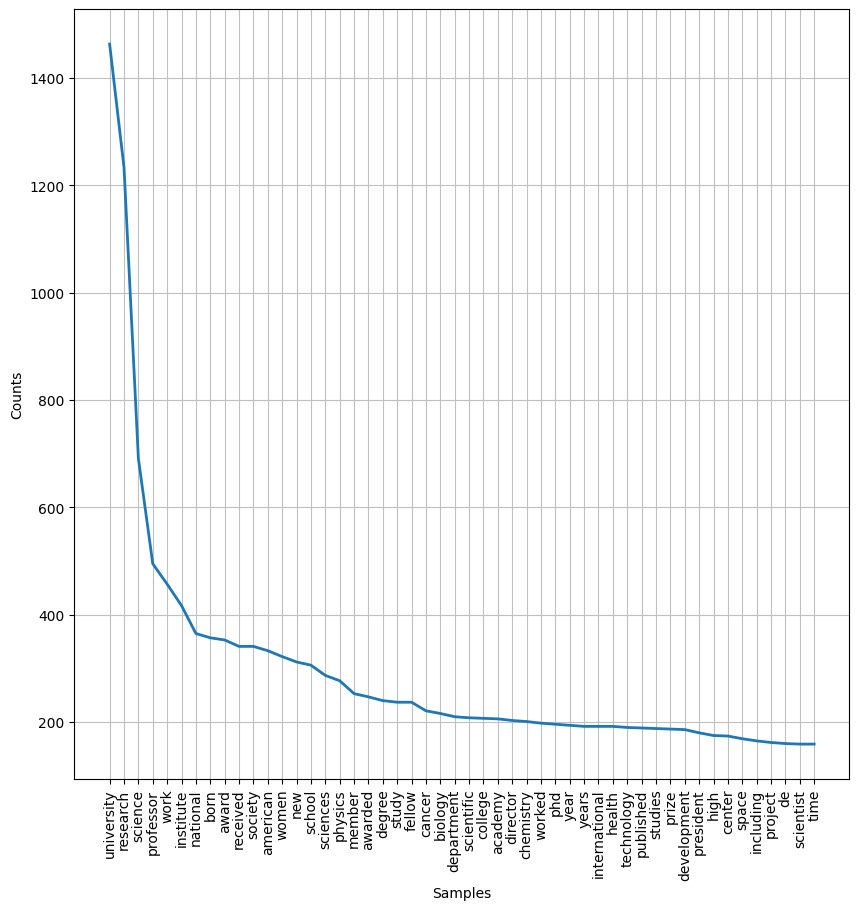

In [34]:
fig = plt.figure(figsize=(10, 10))
frequency_dist = nltk.FreqDist([tok.text for tok in Scientists_tokens])
frequency_dist.plot(50)
# plt.title("50 most frequent words:Women_Scientists")
# fig.savefig("../data/plots/50_most_frequent_words_Women_Scientists.png", bbox_inches="tight")
plt.show()

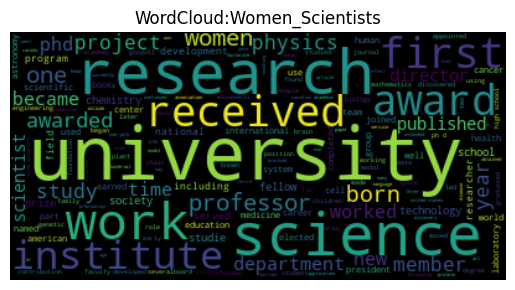

In [35]:
wordcloud = WordCloud().generate(Scientists)
plt.title("WordCloud:Women_Scientists")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("../data/plots/WordCloud_Women_Scientists.png", bbox_inches="tight")
plt.show()

## 3. Sentences extraction  
In this part, we'll give some statistics about the sentences for each category's articles. We'll answer these questions:  
- How many sentences are there for each category ?  
- What are the minimum, maximum, and average number of sentences per article for each category ?  
- What are the minimum, maximum, and average number of tokens per sentence for each category ?

In [36]:
pres_sentences = sent_tokenize(Presidents)
sci_sentences = sent_tokenize(Scientists)

print(f"- Number of sentence for category 'US_Presidents': {len(pres_sentences)}")
print(f"- Number of sentence for category 'Women_Scientists': {len(sci_sentences)}")

- Number of sentence for category 'US_Presidents': 23506
- Number of sentence for category 'Women_Scientists': 6951


In [37]:
# A few sentences from the category 'US_Presidents'
pres_sentences[:5]

['george walker bush (born july 6, 1946) is an american politician who served as the 43rd president of the united states from 2001 to 2009. a member of the republican party, he previously served as the 46th governor of texas from 1995 to 2000. the son of the 41st president, george h. w. bush, bush flew warplanes in the texas air national guard while in his twenties.',
 'after graduating from harvard business school in 1975, he worked in the oil industry.',
 'he later co-owned the texas rangers of major league baseball before being elected governor of texas in 1994. as governor, bush successfully sponsored legislation for tort reform, increased education funding, set higher standards for schools, and reformed the criminal justice system.',
 "he also helped make texas the united states' leading producer of wind-powered electricity.",
 'in the 2000 united states presidential election, bush defeated democratic incumbent vice president al gore, despite losing the popular vote after a narrow

In [38]:
# A few sentences from the category 'Women_Scientists'
sci_sentences[:5]

['eva syková (born 1944) is a czech neuroscientist whose research focused on the origins, mechanisms and maintenance of ionic and volume homeostasis in the cns and the role of extrasynaptic transmission, spinal cord injury.',
 'she is currently leading several clinical studies, including a phase i/ii study in patients with spinal cord injury as well as ongoing clinical studies of patients with als and ischemic leg injury.',
 'she was director of institute of experimental medicine and the head of the center for cell therapy and tissue repair at charles university in prague.',
 'eva syková is author of 421 publications and co-holder of 7 patents with an h-index of 50. this article about a czech scientist is a stub.',
 'you can help wikipedia by expanding it.this neuroscience article is a stub.']

### Min/max/avg number of sentences per article for each category

In [39]:
pre_sci_df["nb_of_sentences"] = pre_sci_df["content"].apply(lambda x: len(sent_tokenize(x)))
pre_sci_df

,title,content,category,clean_text,tokens,filtered_tokens,nb_of_sentences
0,Eva Syková,Eva Syková (born 1944) is a Czech neuroscienti...,Women_Scientists,eva syková (born 1944) is a czech neuroscienti...,"[eva, syková, (, born, 1944, ), is, a, czech, ...","[eva, syková, born, 1944, czech, neuroscientis...",7
1,Maria Kovacs,Maria Kovacs is an American psychologist and a...,Women_Scientists,maria kovacs is an american psychologist and a...,"[maria, kovacs, is, an, american, psychologist...","[maria, kovacs, american, psychologist, academ...",13
2,Joanne Johnson,"\nJoanne S. Johnson (born 1977, Birmingham, né...",Women_Scientists,"joanne s. johnson (born 1977, birmingham, née ...","[joanne, s., johnson, (, born, 1977, ,, birmin...","[joanne, s., johnson, born, 1977, birmingham, ...",22
3,Hua Eleanor Yu,Hua Eleanor Yu is the inaugural Billy and Audr...,Women_Scientists,hua eleanor yu is the inaugural billy and audr...,"[hua, eleanor, yu, is, the, inaugural, billy, ...","[hua, eleanor, yu, inaugural, billy, audrey, l...",24
4,Manju Ray,Manju Ray was an Indian scientist specializing...,Women_Scientists,manju ray was an indian scientist specializing...,"[manju, ray, was, an, indian, scientist, speci...","[manju, ray, indian, scientist, specializing, ...",12
...,...,...,...,...,...,...,...
373,Jennifer Thomson,"\nJennifer Ann Thomson (born June 16, 1947) is...",Women_Scientists,"jennifer ann thomson (born june 16, 1947) is a...","[jennifer, ann, thomson, (, born, june, 16, ,,...","[jennifer, ann, thomson, born, june, 16, 1947,...",13
374,William McKinley,"\nWilliam McKinley (January 29, 1843 – Septemb...",US_Presidents,"william mckinley (january 29, 1843 – september...","[william, mckinley, (, january, 29, ,, 1843, –...","[william, mckinley, january, 29, 1843, septemb...",517
375,Priyamvada Natarajan,\nPriyamvada (Priya) Natarajan is a professor ...,Women_Scientists,priyamvada (priya) natarajan is a professor in...,"[priyamvada, (, priya, ), natarajan, is, a, pr...","[priyamvada, priya, natarajan, professor, depa...",22
376,Afërdita Veveçka Priftaj,\nAfërdita Veveçka Priftaj (21 January 1948 – ...,Women_Scientists,afërdita veveçka priftaj (21 january 1948 – 4 ...,"[afërdita, veveçka, priftaj, (, 21, january, 1...","[afërdita, veveçka, priftaj, 21, january, 1948...",16


In [40]:
sentences_counts = pre_sci_df.groupby("category")["nb_of_sentences"].describe()
sentences_counts

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
US_Presidents,46.0,558.500000,144.413103,328.0,451.5,531.0,646.0,900.0
Women_Scientists,332.0,24.521084,19.987976,5.0,14.0,20.0,28.0,214.0


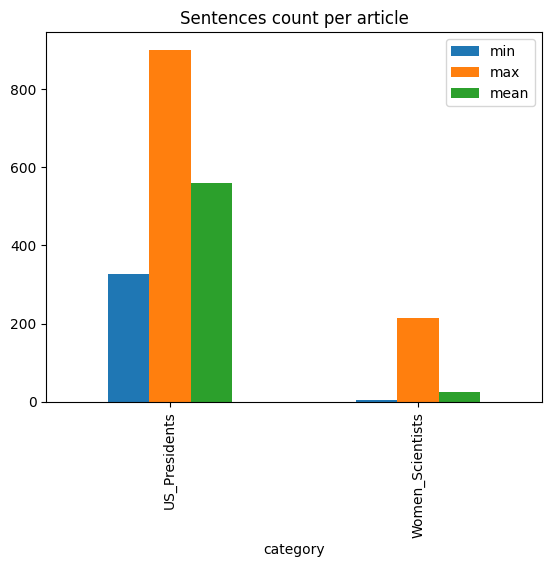

In [42]:
# Plot histogram of the number of sentences per article
sentences_counts[["min", "max", "mean"]].plot(kind="bar", title="Sentences count per article")
# plt.savefig("../data/plots/Sentences_count_per_article.png", bbox_inches="tight")
plt.show()

A remark: when we use the sum of sentences counts for each category, we don't find the same exact total counts as before. This is because, before, we artifically reconstitute a global text with all articles, only joining sentences with whitespaces.

In [43]:
sentences_sum = pre_sci_df.groupby("category")["nb_of_sentences"].sum()
sentences_sum

category
US_Presidents       25691
Women_Scientists     8141
Name: nb_of_sentences, dtype: int64

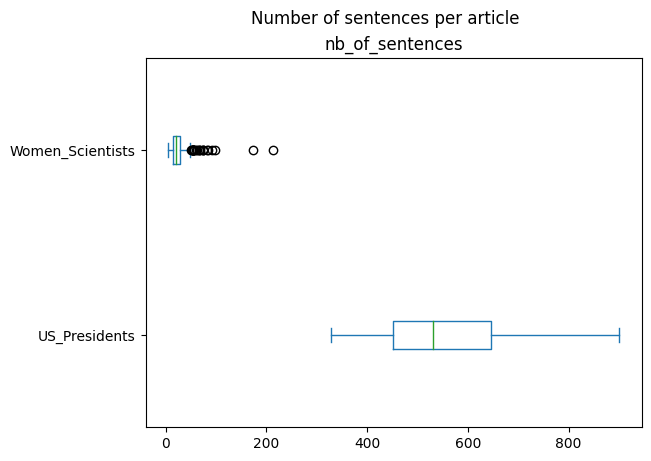

In [45]:
pre_sci_df[["nb_of_sentences", "category"]].plot(kind = "box", by = "category", title = "Number of sentences per article", vert=False)
# plt.savefig("../data/plots/Boxplot_Sentences_count_per_article.png", bbox_inches="tight")
plt.show()

### Min/max/avg number of tokens per sentence for each category 

In [46]:
pre_sci_df["nb_of_tokens"] = pre_sci_df["tokens"].apply(len)
pre_sci_df["nb_of_tokens_per_sentence"] = pre_sci_df["nb_of_tokens"] / pre_sci_df["nb_of_sentences"]
pre_sci_df

,title,content,category,clean_text,tokens,filtered_tokens,nb_of_sentences,nb_of_tokens,nb_of_tokens_per_sentence
0,Eva Syková,Eva Syková (born 1944) is a Czech neuroscienti...,Women_Scientists,eva syková (born 1944) is a czech neuroscienti...,"[eva, syková, (, born, 1944, ), is, a, czech, ...","[eva, syková, born, 1944, czech, neuroscientis...",7,154,22.000000
1,Maria Kovacs,Maria Kovacs is an American psychologist and a...,Women_Scientists,maria kovacs is an american psychologist and a...,"[maria, kovacs, is, an, american, psychologist...","[maria, kovacs, american, psychologist, academ...",13,237,18.230769
2,Joanne Johnson,"\nJoanne S. Johnson (born 1977, Birmingham, né...",Women_Scientists,"joanne s. johnson (born 1977, birmingham, née ...","[joanne, s., johnson, (, born, 1977, ,, birmin...","[joanne, s., johnson, born, 1977, birmingham, ...",22,681,30.954545
3,Hua Eleanor Yu,Hua Eleanor Yu is the inaugural Billy and Audr...,Women_Scientists,hua eleanor yu is the inaugural billy and audr...,"[hua, eleanor, yu, is, the, inaugural, billy, ...","[hua, eleanor, yu, inaugural, billy, audrey, l...",24,570,23.750000
4,Manju Ray,Manju Ray was an Indian scientist specializing...,Women_Scientists,manju ray was an indian scientist specializing...,"[manju, ray, was, an, indian, scientist, speci...","[manju, ray, indian, scientist, specializing, ...",12,231,19.250000
...,...,...,...,...,...,...,...,...,...
373,Jennifer Thomson,"\nJennifer Ann Thomson (born June 16, 1947) is...",Women_Scientists,"jennifer ann thomson (born june 16, 1947) is a...","[jennifer, ann, thomson, (, born, june, 16, ,,...","[jennifer, ann, thomson, born, june, 16, 1947,...",13,234,18.000000
374,William McKinley,"\nWilliam McKinley (January 29, 1843 – Septemb...",US_Presidents,"william mckinley (january 29, 1843 – september...","[william, mckinley, (, january, 29, ,, 1843, –...","[william, mckinley, january, 29, 1843, septemb...",517,13626,26.355899
375,Priyamvada Natarajan,\nPriyamvada (Priya) Natarajan is a professor ...,Women_Scientists,priyamvada (priya) natarajan is a professor in...,"[priyamvada, (, priya, ), natarajan, is, a, pr...","[priyamvada, priya, natarajan, professor, depa...",22,456,20.727273
376,Afërdita Veveçka Priftaj,\nAfërdita Veveçka Priftaj (21 January 1948 – ...,Women_Scientists,afërdita veveçka priftaj (21 january 1948 – 4 ...,"[afërdita, veveçka, priftaj, (, 21, january, 1...","[afërdita, veveçka, priftaj, 21, january, 1948...",16,461,28.812500


In [47]:
tokens_per_sentence_df = pre_sci_df.groupby("category")["nb_of_tokens_per_sentence"].describe()
tokens_per_sentence_df

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
US_Presidents,46.0,26.383907,1.297963,23.341493,25.394029,26.471619,27.206366,28.912351
Women_Scientists,332.0,23.863055,4.288405,12.406542,20.987500,23.651116,26.545151,37.750000


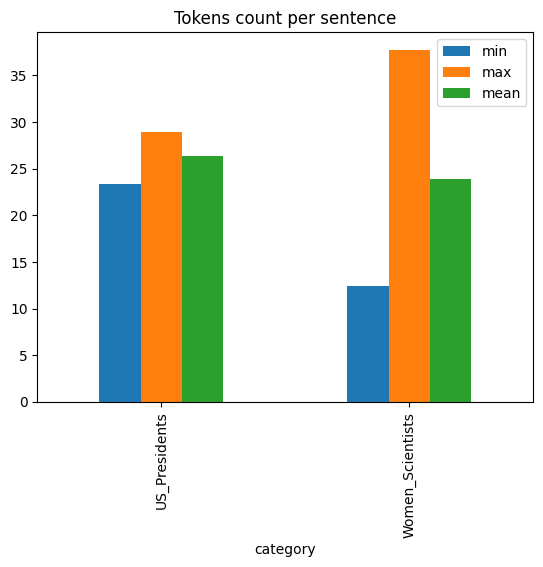

In [48]:
# Plot histogram of the number of tokens per sentences
tokens_per_sentence_df[["min", "max", "mean"]].plot(kind="bar", title="Tokens count per sentence")
# plt.savefig("../data/plots/Tokens_per_sentences.png", bbox_inches="tight")
plt.show()

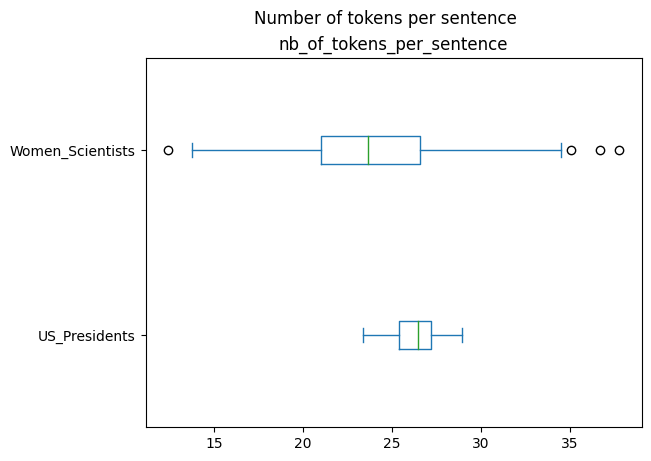

In [49]:
pre_sci_df[["nb_of_tokens_per_sentence", "category"]].plot(kind = "box", by = "category", title = "Number of tokens per sentence", vert=False)
# plt.savefig("../data/plots/Boxplot_Tokens_per_sentence.png", bbox_inches="tight")
plt.show()

#### Comparing Vocabulary size

Below: Vocabulary size corresponds with number of unique filtered tokens.

In [50]:
def get_all_tokens(cat):
    subframe = pre_sci_df[pre_sci_df['category'] == cat]
    all_tokens = []

    for tokens_list in subframe["tokens"]:
        all_tokens.extend(tokens_list)

    return all_tokens

def get_filtered_tokens(cat):
    subframe = pre_sci_df[pre_sci_df['category'] == cat]
    filtered_tokens = []

    for tokens_list in subframe["filtered_tokens"]:
        filtered_tokens.extend(tokens_list)

    return filtered_tokens

vocabs = []

for cat in ["US_Presidents", "Women_Scientists"]:
    all_tokens = get_all_tokens(cat)
    filtered_tokens = get_filtered_tokens(cat)
    print(f"Category: {cat}\n")
    print(f"- Number of tokens: {len(all_tokens)}")
    print(f"- Number of unique tokens: {len(set([tok.text for tok in all_tokens]))}")
    print(f"- Number of filtered tokens: {len(filtered_tokens)}")
    voc = set([tok.text for tok in filtered_tokens])
    vocabs.append(voc)
    print(f"- Number of unique filtered tokens: {len(voc)}\n")

Category: US_Presidents

- Number of tokens: 676131
- Number of unique tokens: 25155
- Number of filtered tokens: 330156
- Number of unique filtered tokens: 24825

Category: Women_Scientists

- Number of tokens: 197360
- Number of unique tokens: 16756
- Number of filtered tokens: 98823
- Number of unique filtered tokens: 16443



In [51]:
data_corpus = {'CATEGORY':["US_Presidents", "Women_Scientists"],'VOCABULARY':vocabs}
data_df = pd.DataFrame(data_corpus) 
data_df["VOCAB SIZE"] = data_df["VOCABULARY"].apply(len)
data_df

,CATEGORY,VOCABULARY,VOCAB SIZE
0,US_Presidents,"{angered, vail, understaffed, sears, alcoholic...",24825
1,Women_Scientists,"{nri, cope, learners, jazeera, pupko, sensing,...",16443


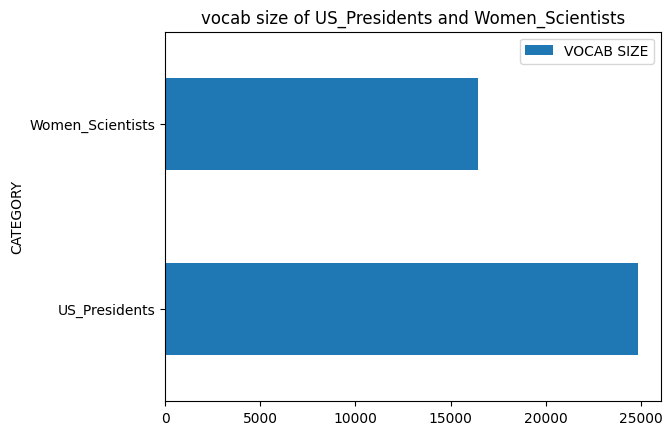

In [52]:
ax = data_df.plot.barh(x='CATEGORY', y='VOCAB SIZE',title="vocab size of US_Presidents and Women_Scientists", rot=0)
# plt.savefig("../data/plots/Vocabulary-size.png", bbox_inches="tight")

# Bonus

# Named Entities (NER), NOUN, VERB, ADJ: US_Presidents

In [54]:
# Divide presidents into 4 parts because the text is too long
Pres_1 = Presidents[:len(Presidents)//4]
Pres_2 = Presidents[len(Presidents)//4:len(Presidents)//2]
Pres_3 = Presidents[len(Presidents)//2:3*len(Presidents)//4]
Pres_4 = Presidents[3*len(Presidents)//4:]

In [74]:
# Find the NE in each part
ne = []
for i, pres in enumerate([Pres_1, Pres_2, Pres_3, Pres_4]):
    doc = nlp(pres)
    ents = [(e.text, e.label_) for e in doc.ents]
    ne.extend(ents)
    print(f"Part {i+1} / 4: {len(ents)} NE")

# Display a few NE in the text
displacy.render(nlp(Pres_1[:1000]), style='ent', jupyter=True)

Part 1 / 4: 15349 NE
Part 2 / 4: 14727 NE
Part 3 / 4: 14909 NE
Part 4 / 4: 15805 NE


In [75]:
print(f"Total Number of NE: {len(ne)}")

Total Number of NE: 60790


In [ ]:
NER_pre=Counter([ent[1] for ent in ne]).most_common(20)

In [ ]:
spacy.explain("TIME")

'Times smaller than a day'

In [ ]:
df_NER_pre = pd.DataFrame(NER_pre, columns=['NER', 'count_NER'])

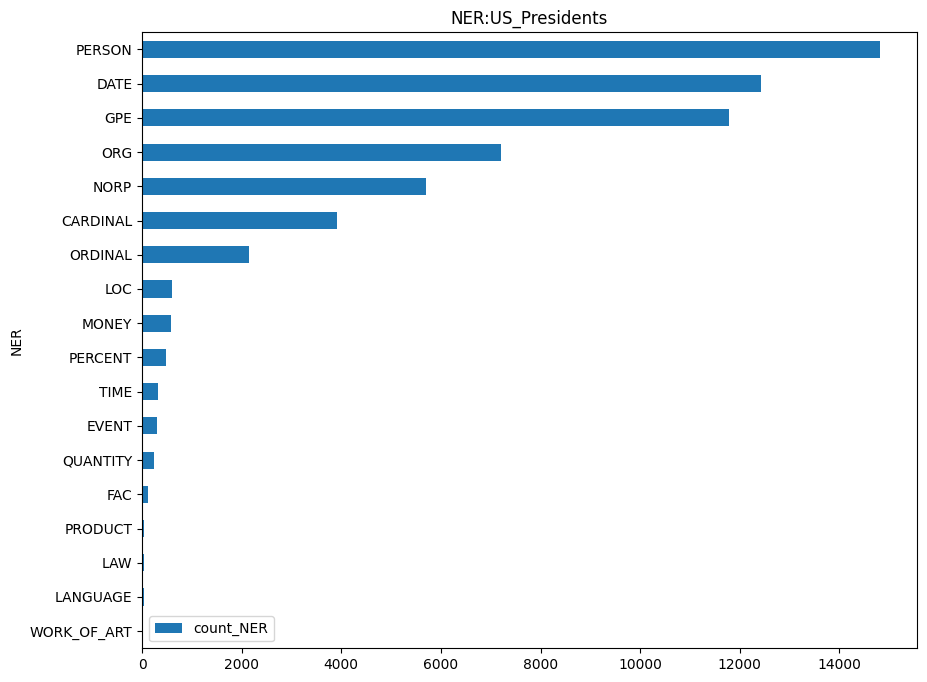

In [ ]:
df_NER_pre.plot.barh(x='NER', y='count_NER', title="NER:US_Presidents", figsize=(10,8)).invert_yaxis()
# plt.savefig("../data/plots/NER_US_Presidents.png", bbox_inches="tight")

### POS counts: Us_Presidents

In [60]:
doc_pres = []
for pres in [Pres_1, Pres_2, Pres_3, Pres_4]:
    doc_pres.append(nlp(pres))

doc_pre = []
for doc in doc_pres:
    doc_pre.extend([tok for tok in doc])

In [72]:
nouns = [token.text for token in doc_pre if token.pos_ == 'NOUN']
verbs = [token.text for token in doc_pre if token.pos_ == 'VERB']
adjs=[token.text for token in doc_pre if token.pos_ == 'ADJ']
nouns_tally = Counter(nouns)
verbs_tally = Counter(verbs)
adjs_tally=Counter(adjs)

df_nouns_pre = pd.DataFrame(nouns_tally.most_common(), columns=['noun', 'count_noun'])
df_verbs_pre = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'count_verb'])
df_adjs_pre = pd.DataFrame(adjs_tally.most_common(), columns=['adjs', 'count_adj'])

Most common POS:

In [76]:
df_pre = pd.concat([df_nouns_pre, df_verbs_pre,df_adjs_pre], axis = 1)
df_pre.head()

,noun,count_noun,verb,count_verb,adjs,count_adj
0,president,1706,had,817.0,first,1056.0
1,war,1234,became,674.0,american,1038.0
2,election,1074,made,648.0,presidential,787.0
3,party,881,won,506.0,other,736.0
4,adams,862,including,480.0,new,724.0


In [78]:
UPOS = ["VERB", "NOUN", "ADJ", "ADV", "PRON", "ADP", "DET", "PROPN", "PUNCT", "PART", "CCONJ", "NUM", "INTJ", "SCONJ", "X", "SYM"]
for pos in UPOS:
    print(f"{pos}: {spacy.explain(pos)}", len([token.text for token in doc_pre if token.pos_ == pos]))

print("total number of tokens:", len(doc_pre))

VERB: verb 70737
NOUN: noun 134280
ADJ: adjective 46477
ADV: adverb 16329
PRON: pronoun 30871
ADP: adposition 80934
DET: determiner 58849
PROPN: proper noun 69411
PUNCT: punctuation 79305
PART: particle 18454
CCONJ: coordinating conjunction 20274
NUM: numeral 18034
INTJ: interjection 73
SCONJ: subordinating conjunction 10229
X: other 438
SYM: symbol 578
total number of tokens: 676134


# Named Entities (NER), NOUN, VERB, ADJ: Women_Scientists

In [81]:
# Divide Scientists into 4 parts because the text is too long
Sci_1 = Scientists[:len(Scientists)//4]
Sci_2 = Scientists[len(Scientists)//4:len(Scientists)//2]
Sci_3 = Scientists[len(Scientists)//2:3*len(Scientists)//4]
Sci_4 = Scientists[3*len(Scientists)//4:]

In [76]:
# Find the NE in each part
ne_sci = []
for i, sci in enumerate([Sci_1, Sci_2, Sci_3, Sci_4]):
    doc = nlp(sci)
    ents = [(e.text, e.label_) for e in doc.ents]
    ne_sci.extend(ents)
    print(f"Part {i+1} / 4: {len(ents)} NE")

# Display a few NE in the text
displacy.render(nlp(Sci_1[:1000]), style='ent', jupyter=True)

Part 1 / 4: 3833 NE
Part 2 / 4: 3741 NE
Part 3 / 4: 3633 NE
Part 4 / 4: 3875 NE


In [77]:
print(f"Total Number of NE: {len(ne_sci)}")

Total Number of NE: 15082


In [81]:
NER_sci=Counter([ne[1] for ne in ne_sci]).most_common(20)

In [82]:
df_NER_sci = pd.DataFrame(NER_sci, columns=['NER', 'count_NER'])

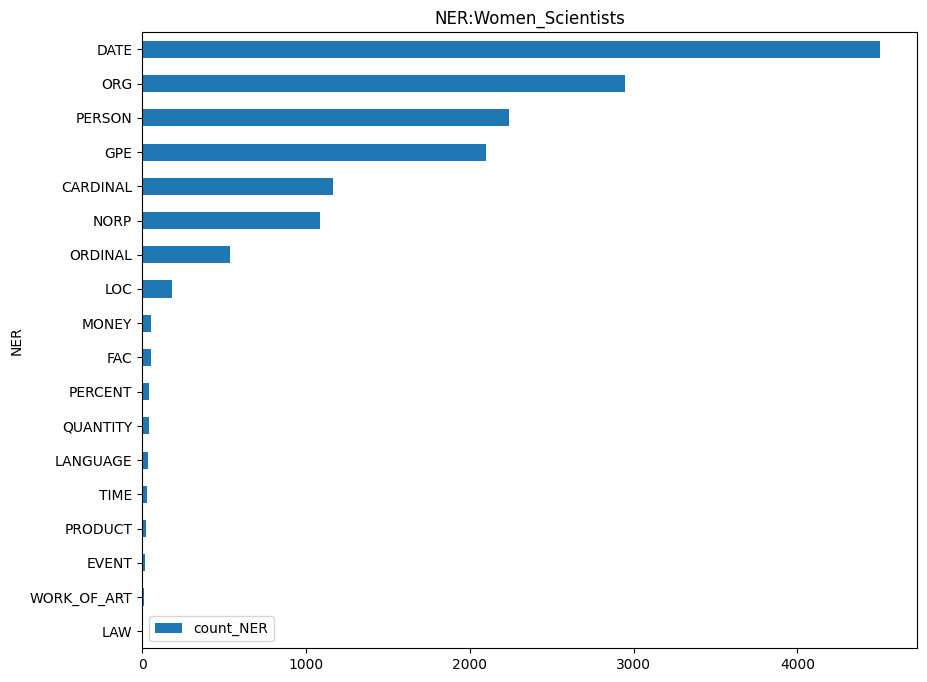

In [84]:
df_NER_sci.plot.barh(x='NER', y='count_NER', title="NER:Women_Scientists", figsize=(10,8)).invert_yaxis()
# plt.savefig("../data/plots/NER_Scientists.png", bbox_inches="tight")

#### POS counts: Women Scientists

In [83]:
doc_women = []
for sci in [Sci_1, Sci_2, Sci_3, Sci_4]:
    doc_women.append(nlp(sci))

doc_wom = []
for doc in doc_women:
    doc_wom.extend([tok for tok in doc])

In [86]:
nouns = [token.text for token in doc_wom if token.pos_ == 'NOUN']
verbs = [token.text for token in doc_wom if token.pos_ == 'VERB']
adjs=[token.text for token in doc_wom if token.pos_ == 'ADJ']
nouns_tally = Counter(nouns)
verbs_tally = Counter(verbs)
adjs_tally=Counter(adjs)

df_nouns_sci = pd.DataFrame(nouns_tally.most_common(), columns=['noun', 'count_noun'])
df_verbs_sci = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'count_verb'])
df_adjs_sci = pd.DataFrame(adjs_tally.most_common(), columns=['adjs', 'count_adj'])

In [87]:
df_sci = pd.concat([df_nouns_sci, df_verbs_sci,df_adjs_sci], axis = 1)
df_sci.head()

,noun,count_noun,verb,count_verb,adjs,count_adj
0,research,1120,born,357.0,first,374.0
1,science,559,received,341.0,scientific,208.0
2,professor,448,awarded,247.0,new,190.0
3,work,417,worked,198.0,american,187.0
4,women,321,became,197.0,high,168.0


In [88]:
UPOS = ["VERB", "NOUN", "ADJ", "ADV", "PRON", "ADP", "DET", "PROPN", "PUNCT", "PART", "CCONJ", "NUM", "INTJ", "SCONJ", "X", "SYM"]
for pos in UPOS:
    print(f"{pos}: {spacy.explain(pos)}", len([token.text for token in doc_wom if token.pos_ == pos]))

print("total number of tokens:", len(doc_wom))

VERB: verb 15602
NOUN: noun 45016
ADJ: adjective 13944
ADV: adverb 3256
PRON: pronoun 8659
ADP: adposition 27491
DET: determiner 15892
PROPN: proper noun 20402
PUNCT: punctuation 23133
PART: particle 2885
CCONJ: coordinating conjunction 6451
NUM: numeral 6241
INTJ: interjection 9
SCONJ: subordinating conjunction 1672
X: other 283
SYM: symbol 226
total number of tokens: 197363
